# Small note :)
As requested, the description of the problems is kept in the assignment. A small text explaining what we did and how we did it is included at each exercise, and considerations for each exercise are included if it has either been requested or seems relevant.

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library to generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

## Binning real numbers
### Creation
First the 5000 random data points are created. A small note here is that we use np.random.normal for gaussian distrubution instead of pythons `random`-package, but functionality should be the same. 

### Histogram
Histogram is created with ```numpy.histogram()```, and selecting 10 bins.

### Count and bin arrays are of different length
The reason the two arrays are of different length, is that the bin array is a range from i $\to$ i+1 for every index in count. To circumvent this, we write the values of the bins between the numbers to highlight, that the count within a pillar is in the range between i $\to$ i+1.

In [2]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
sns.set_style("darkgrid")
sns.set()
%matplotlib inline

<font color="red"> I think the bins should be done something like: </font>

In [6]:
np.random.seed(42)
mu, sigma, size = 2, 0.125, 5000
numbers = np.random.normal(mu, sigma, size)

hist = np.histogram(numbers, bins=10)

bins = hist[1]

bins = (bins[:-1] + bins[1:])/2
bins

array([1.63963849, 1.7292323 , 1.81882612, 1.90841993, 1.99801374,
       2.08760755, 2.17720137, 2.26679518, 2.35638899, 2.44598281])

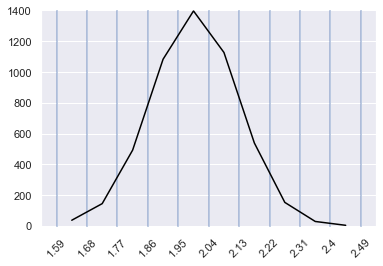

In [3]:
# Creating gaussian distributed numbers
np.random.seed(42)
mu, sigma, size = 2, 0.125, 5000
numbers = np.random.normal(mu, sigma, size)

# Creating histogram
hist = np.histogram(numbers, bins=10)

# Plotting
plt.plot([x for x in range(10)], hist[0], color="black")
bin_coords = [((x-.5)) for x in range(11)]

plt.vlines(bin_coords, -1000, 1500, alpha=.5)
plt.xticks(bin_coords, np.round(hist[1], 2), rotation=45)

plt.ylim(np.min(hist[0]) - 10, np.max(hist[0]) + 10)

plt.show()

## Binning integers
### Creating with np
Instructions are followed. Poisson automatically returns an integer, so the dtype does not have to be specified.

### Binning
To create the correct number of bins, we look at the documentation from [numpy.histogram](https://numpy.org/devdocs/reference/generated/numpy.histogram.html). Here it states: "*...the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). However, the last bin is [3, 4], which includes 4.*" To paraphrase, the bin vector needs to span between the lowest value and the highest value + 1, as the last bin is inclusive, and all bins are included before, are not.

### Plotting
Plotting like in the previous exercise

Min is: 1, Max is: 24


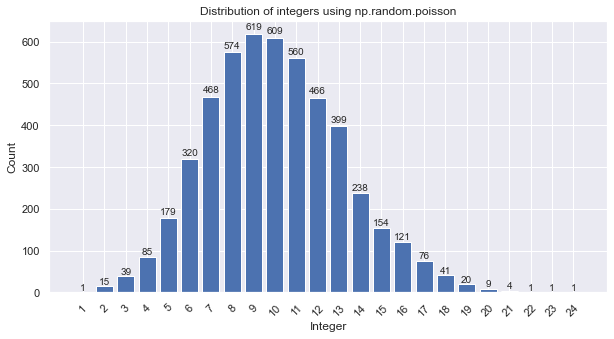

In [4]:
# Creating poisson distributed numbers
np.random.seed(42)
lam, size = 10, 5000
numbers = np.random.poisson(lam, 5000)
mi, ma = min(numbers), max(numbers)
print(f"Min is: {mi}, Max is: {ma}")

# Arranging bins
bin_vec = np.arange(mi, ma+2)
hist = np.histogram(numbers, bin_vec)

# Plotting barchart, with a little cherry on top 🍒
plt.subplots(1, 1, figsize=(10, 5))
plt.bar(hist[1][:-1], hist[0])
plt.xticks(hist[1][:-1], rotation=45)

for x, y in zip(hist[1][:-1], hist[0]):
    plt.text(x, y*1.01, y, verticalalignment="bottom", horizontalalignment="center")


plt.title("Distribution of integers using np.random.poisson")
plt.xlabel("Integer")
plt.ylabel("Count")
plt.show()

## Binning and plotting degree distribution
### Calculating $N$ and $P$
We are already given $N=5000$ and $k=10$, as well as the formula for calculating $p$. Rearranging in the formula gives:
$$
    p = \frac{\left< k \right>}{N-1} 
$$
The formula is used in the code below to get the final result.

### Creating graph with networkx
Erdös-Renyi graph is constructed using networkx as instructed.

### Bar plot
The final result strongly resembles the Poisson distributed histogram created in the last exercise.

P = 0.0020


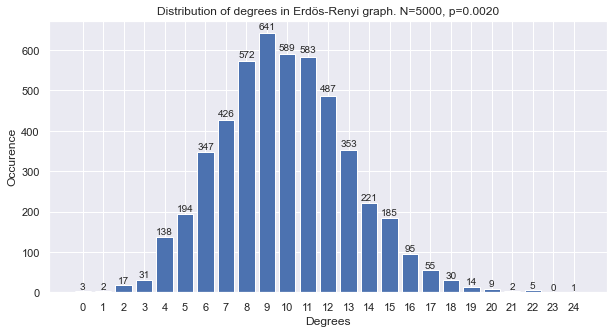

In [5]:
# Calculating p
N, k = 5000, 10
p = k/(N-1)
print(f"P = {p:.4f}")

# Creating graph
G = nx.generators.random_graphs.erdos_renyi_graph(N, p, seed=42)

# Creating barchart
plt.subplots(1, 1, figsize=(10, 5))

hist = nx.degree_histogram(G)
plt.bar([x for x in range(len(hist))], hist)
plt.xticks([x for x in range(len(hist))])

for x, y in zip([x for x in range(len(hist))], hist):
    plt.text(x, y*1.01, y, verticalalignment="bottom", horizontalalignment="center")

plt.xlabel("Degrees")
plt.ylabel("Occurence")
plt.title(f"Distribution of degrees in Erdös-Renyi graph. N={N}, p={p:.4f}")
plt.show()

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

## Excercise 3.1
[Description](http://networksciencebook.com/chapter/3#homework3): "*Consider an Erdős-Rényi network with $N = 3,000$ nodes, connected to each other with probability $p = 10^{–3}$.*"

* What is the expected number of links.

Average number of links $\left< L \right>$ is given as:
$$
    \left< L \right> = \frac{p N (N -1)}{2}
$$
Inserting values, we get:
$$
    \Rightarrow \left< L \right> = \frac{10^{-3} \cdot 3000 \cdot (3000 -1)}{2} = 4498.5
$$

* In what regime is the graph

We look at the definitions using these values as we already know, $p$ and $N$.
As $p > 1/N \: (10^{-3} > \frac{1}{3000})$ but $p \ngeq \ln N / N (10^{-3} \ngeq \frac{\ln 3000}{3000})$, this configuration is in the supercritical regime.

* Calculate p, so the graph is at the critical point

From the book we see, that the definiton of the critical point is $\left<k\right> = 1, (p=\frac{1}{N})$
The value for p in this graph is therefore calculated as:

$$
    p_{critical point} = \frac{1}{3000} = 3000^{-1} = 3 \cdot 10^{-4}
$$

* Given the linking probability $p=10^{-3}$, calculate the number of nodes so that the network only has one component.

Erdős-Rényi Networks is composed of one component when the graph is in the connected regime, defined as $\left< k \right> \geq \ln N, (p > \frac{\ln N}{N})$. There is probably a proper way to calculate this. Instead of finding this solution, we looked at the definition of the connected component shown before. The left side can be expressed with $p(N-1)$, and the right side can be expressed as is. Using a range between 1 and 20.000, we calculate the left and right side and highlight the first time where $\left< k \right> \geq \ln N)$. Using the formula, we get the result $N=9119$

* Calculate the average degree and average distance

For the network above, we have 
$$
    \begin{matrix}
    N = 9119 \\ p=10^{-3} \\ \left< k \right> = 10^{-3}\cdot (9119 -1 ) = 9.118
    \end{matrix}
$$

The average degree is seen as 9.118. The average distance can be calculated with:
$$
    \langle d\rangle \propto \frac{\ln N}{\ln \langle k\rangle}
$$

Inputting we get:

$$
    \langle d\rangle \propto \frac{\ln 9119}{\ln 9.118} = 4.12538
$$

* Calculate degree distribution of network

Degree distribution of Poisson is done and visualized in the code block below.

$$
    p_{k}=e^{-\langle k\rangle} \frac{\langle k\rangle^{k}}{k !}
$$



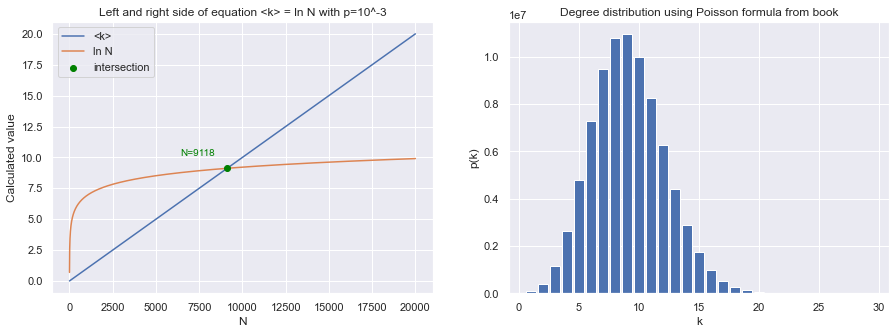

In [6]:
# Calculation of number of nodes for critical point
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

N = np.arange(2, 20000)
p = 10**(-3)

left = p * (N - 1)
right = np.log(N)

point = np.where(left >= right)[0][0]

ax1.plot(N, left)
ax1.plot(N, right)
ax1.scatter(point, left[point], zorder=10, color="green")
ax1.text(point*0.7, left[point]+1, f"N={point}", color="green")

ax1.legend(["<k>", "ln N", "intersection"])
ax1.set_title("Left and right side of equation <k> = ln N with p=10^-3")

ax1.set_xlabel("N")
ax1.set_ylabel("Calculated value")

# Calculation for Poisson distribution
k = 9.118
nums = np.arange(1, 30)
factorials = [np.math.factorial(x) for x in nums]

dist =  np.exp(k) * (np.power(k, nums)/factorials)

ax2.bar(nums, dist)

ax2.set_xlabel("k")
ax2.set_ylabel("p(k)")
ax2.set_title("Degree distribution using Poisson Form from book")

plt.show()

## Paths
This excercise is so well described we will not comment further here, and stick to comments in the code below.

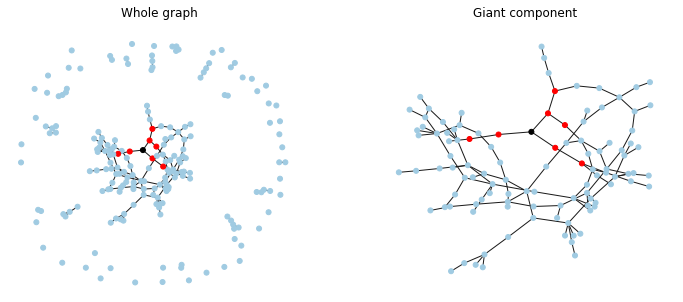

In [12]:
sns.reset_orig()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

kwargs = {
    "node_size": 25,
}

# Creating random erdos-renyi random graph
N = 200
k = 1.5
p = k/(N-1)
G = nx.random_graphs.fast_gnp_random_graph(N, p, seed=42)
pos = nx.spring_layout(G, seed=42)

# Extracting giant component (gc)
gc = G.subgraph(next(nx.connected_components(G))).copy()

# Choosing random node and walking
np.random.seed(42)
random_node = np.random.choice(gc.nodes())
two_step_nodes = list(nx.single_source_shortest_path_length(G, random_node, cutoff=2).keys())

# Coloring
colors = np.zeros(200, dtype=object)
colors[:] = "#A0CBE2"
colors[two_step_nodes] = "#ff0000"
colors[random_node] = "#000000"

# Drawing original graph
nx.draw(G, pos=pos, ax=ax1, node_color = colors, **kwargs)
ax1.set_title("Whole graph")

# Drawing giant component
nx.draw(gc, pos=pos, ax=ax2, node_color = colors[gc.nodes()], **kwargs)
ax2.set_title("Giant component")

plt.show()

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

## Short experiment
Comment on what happens when $p=1$. As seen in the book [section 3.9](http://networksciencebook.com/chapter/3#clustering-3-9), it is both explained and illustrated that as $p \to 1$ the watts-strogatz model moves towards a random network.

<font color="red"> I would write some basic comm </font>

In [8]:
# First excercise
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

# Variables
n = 500
k = 4
ps = [0, .1, 1]

# Creating graphs
graphs = [(nx.watts_strogatz_graph(N, k, p), p) for p in ps]

for graph, p in graphs:
  print(f"p={p}, avg shortest: {average_shortest_path_length(graph)}")

p=0, avg shortest: 25.376884422110553
p=0.1, avg shortest: 6.992814070351759
p=1, avg shortest: 3.986030150753769


In [9]:
# Second excercise
N = 500
k = 4
ps = [0, .01, .03, .05, .1, .2]

graphs = [[nx.watts_strogatz_graph(N, k, p) for _ in range(50)] for p in ps]
avgs = np.zeros((6, 50))
for i, row in enumerate(graphs):
    for j, graph in enumerate(row):
        avgs[i, j] = average_shortest_path_length(graph)

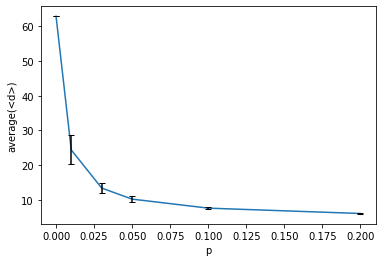

In [10]:
avg = np.average(avgs, axis=1)
std = np.std(avgs, axis=1)

plt.errorbar(ps, avg, std, barsabove=True, ecolor="black", capsize=3)
plt.xlabel("p")
plt.ylabel("average(<d>)")

plt.show()

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.